**Support Vector Machines (SVMs)**

Are a powerful class of supervised machine learning
models. The core idea is to find an optimal "hyperplane" that best separates the classes in
your data.
However, many real-world datasets are not linearly separable. You can't draw a single
straight line to separate the classes. This is where the kernel trick comes in. A kernel
function can project your data into a much higher-dimensional space where a linear separator
can be found, without the massive computational cost.
In this assignment, you will work with a classic non-linear "moons" dataset. You will see
firsthand why a linear SVM fails and how kernelized SVMs (RBF, Polynomial) can easily solve the problem. You will also tune the key hyperparameters ( C , gamma ) that govern the
model's behavior.



**TASK - 1**

a. Importing all the libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix
)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

**TASK -1**

b. Generating the Moons data.

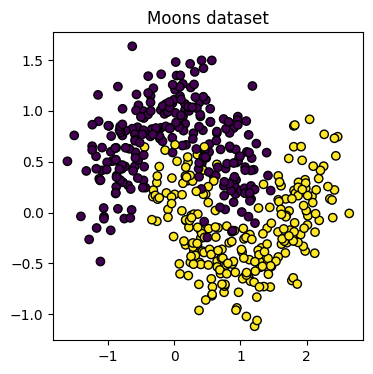

In [ ]:
X, y = make_moons(n_samples=500, noise=0.25, random_state=RANDOM_STATE)

# quick scatter to see non-linearity
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k")
plt.title("Moons dataset")
plt.show()

**TASK - 1**

c. Splitting data in test , train and validation.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)
X_train.shape, X_val.shape

((350, 2), (150, 2))

**TASK - 1**

d. Standard Scaler.

In [ ]:
scaler = StandardScaler().fit(X_train)     # fit on train
X_train_scaled = scaler.transform(X_train) # transform train
X_val_scaled   = scaler.transform(X_val)   # transform val

**TASK - 2**

a. Training the Support vector classifier model using the train data.

In [ ]:

linear_model = SVC(kernel='linear', C=1.0, random_state=RANDOM_STATE)
linear_model.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

**TASK - 2**

b. Evaluation of SVM model.

c. Analyzing.

In [ ]:
y_pred_linear = linear_model.predict(X_val_scaled)
print("Linear SVM accuracy:", accuracy_score(y_val, y_pred_linear))
print("\nClassification report (Linear):\n")
print(classification_report(y_val, y_pred_linear))

Linear SVM accuracy: 0.84

Classification report (Linear):

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        75
           1       0.86      0.81      0.84        75

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



**TASK - 3**

a. RBF Kernel Model

In [ ]:
rbf_model = SVC(kernel='rbf', random_state=RANDOM_STATE)  # default params
rbf_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred_rbf = rbf_model.predict(X_val_scaled)
acc_rbf = accuracy_score(y_val, y_pred_rbf)
print("RBF (default) accuracy:", acc_rbf)
print("\nClassification report (RBF default):\n")
print(classification_report(y_val, y_pred_rbf))

RBF (default) accuracy: 0.9466666666666667

Classification report (RBF default):

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        75
           1       0.97      0.92      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



**TASK - 3**

b. Polynomial Kernel Model.

In [ ]:
poly_model = SVC(kernel='poly', degree=3, random_state=RANDOM_STATE)
poly_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred_poly = poly_model.predict(X_val_scaled)
acc_poly = accuracy_score(y_val, y_pred_poly)
print("Poly (degree=3) accuracy:", acc_poly)
print("\nClassification report (Poly d=3):\n")
print(classification_report(y_val, y_pred_poly))

Poly (degree=3) accuracy: 0.84

Classification report (Poly d=3):

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        75
           1       0.83      0.85      0.84        75

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



**TASK - 3**

c. Comparing validation accuracies (Linear, RBF, Poly)

In [ ]:
acc_linear = accuracy_score(y_val, y_pred_linear)
comparison = pd.DataFrame(
    {
        "Model": ["Linear (C=1)", "RBF (default)", "Poly (degree=3)"],
        "Validation Accuracy": [acc_linear, acc_rbf, acc_poly],
    }
)
comparison

,Model,Validation Accuracy
0,Linear (C=1),0.840000
1,RBF (default),0.946667
2,Poly (degree=3),0.840000


**Task 4:**

Hyperparameter Tuning with GridSearchCV (30 Marks)
The RBF model was likely the best, but its performance depends heavily on the C
(regularization) and gamma (kernel influence) parameters. You will now find the optimal

a. Defined Search Space.

b. Setup Grid Search.

c. Run Grid Search.

d. Analyzing Results.

In [ ]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.1, 1, 10, 100],
    "kernel": ["rbf"],
}

grid = GridSearchCV(
    SVC(random_state=RANDOM_STATE),
    param_grid,
    refit=True,          # retrain best model on full training set
    cv=5,
    scoring="accuracy",
    verbose=0
)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best CV Accuracy: 0.9542857142857143


**Task 5:**

Final Evaluation and Visualization

a. Evaluating Final Model.



Final tuned RBF accuracy: 0.9533333333333334

Classification report (Final tuned RBF):

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.96      0.95      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



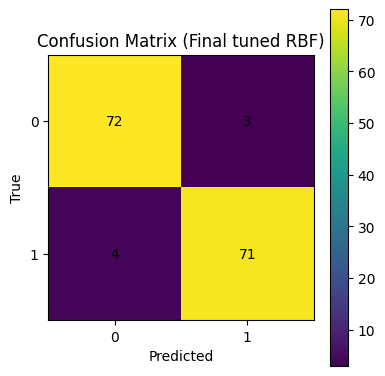

In [ ]:
final_model = grid.best_estimator_
final_predictions = final_model.predict(X_val_scaled)

print("Final tuned RBF accuracy:", accuracy_score(y_val, final_predictions))
print("\nClassification report (Final tuned RBF):\n")
print(classification_report(y_val, final_predictions))

cm = confusion_matrix(y_val, final_predictions)
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (Final tuned RBF)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0,1]); plt.yticks(tick_marks, [0,1])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


**Task - 5**

b. Visualising Decision Boundaries.

In [ ]:
def plot_decision_boundary(ax, model, X_scaled, y, title):
    # mesh grid
    x_min, x_max = X_scaled[:, 0].min()-0.5, X_scaled[:, 0].max()+0.5
    y_min, y_max = X_scaled[:, 1].min()-0.5, X_scaled[:, 1].max()+0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points).reshape(xx.shape)

    # filled decision regions
    ax.contourf(xx, yy, Z, alpha=0.25, levels=np.arange(-0.5,2,1))
    # training points
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=y, edgecolor='k', s=20)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

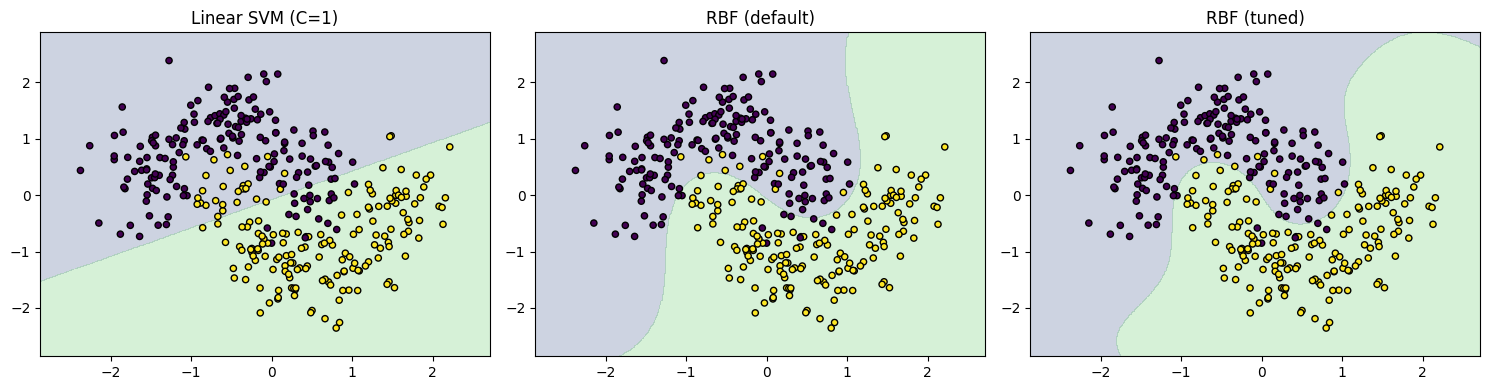

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# IMPORTANT: boundaries on the same (scaled) space using TRAIN set
plot_decision_boundary(axes[0], linear_model, X_train_scaled, y_train, "Linear SVM (C=1)")
plot_decision_boundary(axes[1], rbf_model,    X_train_scaled, y_train, "RBF (default)")
plot_decision_boundary(axes[2], final_model,  X_train_scaled, y_train, "RBF (tuned)")
plt.tight_layout()
plt.show()